In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr,spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
from sklearn.exceptions import DataConversionWarning

### 抽穗期

In [19]:
csq = pd.read_csv('./csq.txt',sep='\t',header=0,index_col=0)
csq.head()

,JZ-Rep1,JZ-Rep2,SZ-Rep1,SZ-Rep2,HN-Rep1,HN-Rep2
ID,,,,,,
IRIS_313-11909,90.0,85.0,75.0,76.0,92.0,94.0
IRIS_313-10852,81.0,82.0,72.0,73.0,92.0,92.0
IRIS_313-10856,NaN,NaN,109.0,NaN,79.0,79.0
IRIS_313-11943,87.0,89.0,76.0,77.0,87.0,87.0
IRIS_313-11944,87.0,85.0,NaN,83.0,85.0,86.0


In [20]:
# 删除缺失值
csq.dropna(axis=0, how='any', inplace=True)
print(csq.shape)
# 计算相关系数
jz,_ = pearsonr(csq['JZ-Rep1'],csq['JZ-Rep2'])
sz,_ = pearsonr(csq['SZ-Rep1'],csq['SZ-Rep2'])
hn,_ = pearsonr(csq['HN-Rep1'],csq['HN-Rep2'])
print('JZ:',jz)
print('SZ:',sz)
print('HN:',hn)

(659, 6)
JZ: 0.7403769946091405
SZ: 0.9470071929008638
HN: 0.9702143886095981


In [21]:
jz_csq = csq[['JZ-Rep1','JZ-Rep2']]
jz_csq['JZ-diff'] = abs(jz_csq['JZ-Rep1'] - jz_csq['JZ-Rep2'])
jz_csq.sort_values(by='JZ-diff',ascending=False,inplace=True)
jz_csq.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\2277584742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jz_csq['JZ-diff'] = abs(jz_csq['JZ-Rep1'] - jz_csq['JZ-Rep2'])
C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\2277584742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jz_csq.sort_values(by='JZ-diff',ascending=False,inplace=True)


,JZ-Rep1,JZ-Rep2,JZ-diff
ID,,,
IRIS_313-11453,72.0,138.0,66.0
IRIS_313-8880,138.0,82.0,56.0
IRIS_313-10274,133.0,82.0,51.0
IRIS_313-10046,93.0,143.0,50.0
IRIS_313-12186,143.0,93.0,50.0


In [22]:
for num in range(10,20):
    # 删除jz_data中JZ-diff大于num的行
    jz_csq1 = jz_csq.drop(jz_csq[jz_csq['JZ-diff'] > num].index,inplace=False)
    # 计算相关系数
    jz_r,_ = pearsonr(jz_csq1['JZ-Rep1'],jz_csq1['JZ-Rep2'])
    print(num,jz_r,jz_csq1.shape[0])

10 0.9355343563129787 539
11 0.9242396621786636 561
12 0.9199106307625822 572
13 0.9137424015629836 581
14 0.9062904386481603 590
15 0.9006227482826631 596
16 0.8958994195949469 603
17 0.8910436105615678 608
18 0.8843709099713091 614
19 0.879688699514273 618


In [23]:
jz_csq_need = jz_csq[jz_csq['JZ-diff'] <= 15].index.tolist()
csq_need = csq.loc[jz_csq_need,:]
print(csq_need.shape)
csq_need.head()

(596, 6)


,JZ-Rep1,JZ-Rep2,SZ-Rep1,SZ-Rep2,HN-Rep1,HN-Rep2
ID,,,,,,
IRIS_313-10423,107.0,92.0,85.0,83.0,93.0,93.0
IRIS_313-12271,107.0,92.0,92.0,90.0,92.0,97.0
CX273,107.0,92.0,89.0,92.0,86.0,86.0
CX355,102.0,117.0,85.0,87.0,90.0,90.0
CX93,87.0,102.0,82.0,88.0,88.0,88.0


In [24]:
# 计算相关系数
jz,_ = pearsonr(csq_need['JZ-Rep1'],csq_need['JZ-Rep2'])
sz,_ = pearsonr(csq_need['SZ-Rep1'],csq_need['SZ-Rep2'])
hn,_ = pearsonr(csq_need['HN-Rep1'],csq_need['HN-Rep2'])
print('JZ:',jz)
print('SZ:',sz)
print('HN:',hn)

JZ: 0.9006227482826631
SZ: 0.9398531374190642
HN: 0.9744324144185266


In [27]:
csq_sample_ls = csq_need.index.tolist()

### 株高

In [25]:
zg = pd.read_csv('./zg.txt',sep='\t',header=0,index_col=0)
zg.head()

,JZ-Rep1,JZ-Rep2,SZ-Rep1,SZ-Rep2,HN-Rep1,HN-Rep2
ID,,,,,,
IRIS_313-11909,152.43,159.00,150.7,151.3,129.4,142.2
IRIS_313-10852,135.50,146.67,138.3,163.3,140.8,125.2
IRIS_313-10856,NaN,NaN,160.7,NaN,104.2,112.4
IRIS_313-11943,160.17,161.00,164.3,164.3,130.2,134.6
IRIS_313-11944,148.10,126.00,NaN,NaN,116.4,123.0


In [26]:
# 删除缺失值
zg.dropna(axis=0, how='any', inplace=True)
print(zg.shape)
# 计算相关系数
jz,_ = pearsonr(zg['JZ-Rep1'],zg['JZ-Rep2'])
sz,_ = pearsonr(zg['SZ-Rep1'],zg['SZ-Rep2'])
hn,_ = pearsonr(zg['HN-Rep1'],zg['HN-Rep2'])
print('JZ:',jz)
print('SZ:',sz)
print('HN:',hn)

(547, 6)
JZ: 0.8338412290568628
SZ: 0.9128048857307578
HN: 0.7282951575067717


In [28]:
jz_zg = zg[['JZ-Rep1','JZ-Rep2']]
jz_zg['JZ-diff'] = abs(jz_zg['JZ-Rep1'] - jz_zg['JZ-Rep2'])
jz_zg.sort_values(by='JZ-diff',ascending=False,inplace=True)
jz_zg.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\4023306736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jz_zg['JZ-diff'] = abs(jz_zg['JZ-Rep1'] - jz_zg['JZ-Rep2'])
C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\4023306736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jz_zg.sort_values(by='JZ-diff',ascending=False,inplace=True)


,JZ-Rep1,JZ-Rep2,JZ-diff
ID,,,
IRIS_313-10400,166.00,105.00,61.00
IRIS_313-9778,177.20,120.00,57.20
IRIS_313-9410,106.77,154.00,47.23
CX276,104.63,58.00,46.63
IRIS_313-10080,145.27,103.67,41.60


In [30]:
for num in range(10,30):
    # 删除jz_data中JZ-diff大于num的行
    jz_zg1 = jz_zg.drop(jz_zg[jz_zg['JZ-diff'] > num].index,inplace=False)
    # 计算相关系数
    jz_r,_ = pearsonr(jz_zg1['JZ-Rep1'],jz_zg1['JZ-Rep2'])
    print(num,jz_r,jz_zg1.shape[0])

10 0.968579700579178 332
11 0.9634078802231933 361
12 0.9560492630027008 390
13 0.9527070659591972 406
14 0.9508065286858195 414
15 0.9421713540359853 437
16 0.9377235901553306 447
17 0.9347626451090802 453
18 0.9271638733562607 468
19 0.921981945206419 478
20 0.9194849603209359 484
21 0.9143335518659311 492
22 0.9115630334746604 497
23 0.9081176948466998 501
24 0.9059584411499405 504
25 0.9039377200666304 506
26 0.9019930579798365 508
27 0.8946801439068456 514
28 0.8932526157536216 515
29 0.8904204110808945 517


In [36]:
jz_zg_need = jz_zg[jz_zg['JZ-diff'] <= 26].index.tolist()
print(len(jz_zg_need))

508


In [37]:
hn_zg = zg_need[['HN-Rep1','HN-Rep2']]
hn_zg['HN-diff'] = abs(hn_zg['HN-Rep1'] - hn_zg['HN-Rep2'])
hn_zg.sort_values(by='HN-diff',ascending=False,inplace=True)
hn_zg.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\62414390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_zg['HN-diff'] = abs(hn_zg['HN-Rep1'] - hn_zg['HN-Rep2'])
C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\62414390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_zg.sort_values(by='HN-diff',ascending=False,inplace=True)


,HN-Rep1,HN-Rep2,HN-diff
ID,,,
IRIS_313-11746,93.0,75.2,17.8
IRIS_313-8154,138.5,121.0,17.5
IRIS_313-9081,76.4,93.8,17.4
IRIS_313-7866,117.0,99.8,17.2
IRIS_313-10065,119.6,102.4,17.2


In [38]:
for num in range(10,20):
    # 删除jz_data中JZ-diff大于num的行
    hn_zg1 = hn_zg.drop(hn_zg[hn_zg['HN-diff'] > num].index,inplace=False)
    # 计算相关系数
    hn_r,_ = pearsonr(hn_zg1['HN-Rep1'],hn_zg1['HN-Rep2'])
    print(num,hn_r,hn_zg1.shape[0])

10 0.9398217535100876 384
11 0.9364666377711139 401
12 0.9262237572590148 419
13 0.9211555814023491 430
14 0.9159723150405804 437
15 0.9117120517610267 442
16 0.9092353039208395 447
17 0.9050973030387366 452
18 0.9003124371758884 457
19 0.9003124371758884 457


In [39]:
hn_zg_need = hn_zg[hn_zg['HN-diff'] <= 18].index.tolist()
print(len(hn_zg_need))

457


In [40]:
# zg_sample_ls为最终需要的样本列表，取交集
zg_sample_ls = list(set(jz_zg_need).intersection(set(hn_zg_need)))
print(len(zg_sample_ls))

457


In [41]:
zg_need = zg.loc[zg_sample_ls,:]
print(zg_need.shape)
zg_need.head()

(457, 6)


,JZ-Rep1,JZ-Rep2,SZ-Rep1,SZ-Rep2,HN-Rep1,HN-Rep2
ID,,,,,,
CX373,111.33,103.00,109.7,108.3,83.4,90.0
IRIS_313-10113,102.00,100.00,126.7,103.0,83.0,88.0
IRIS_313-11598,124.40,123.33,154.3,147.7,103.2,107.0
IRIS_313-11604,132.17,115.00,136.3,134.0,97.8,100.4
IRIS_313-11240,81.97,100.00,99.7,93.3,75.8,85.0


In [42]:
# 计算相关系数
jz,_ = pearsonr(zg_need['JZ-Rep1'],zg_need['JZ-Rep2'])
sz,_ = pearsonr(zg_need['SZ-Rep1'],zg_need['SZ-Rep2'])
hn,_ = pearsonr(zg_need['HN-Rep1'],zg_need['HN-Rep2'])
print('JZ:',jz)
print('SZ:',sz)
print('HN:',hn)

JZ: 0.9000303185255409
SZ: 0.9235834082472936
HN: 0.9003124371758882


### 剑叶长

In [43]:
jyc = pd.read_csv('./jyc.txt',sep='\t',header=0,index_col=0)
jyc.head()

,JZ-Rep1,JZ-Rep2,SZ-Rep1,SZ-Rep2,HN-Rep1,HN-Rep2
ID,,,,,,
IRIS_313-11909,47.97,37.70,36.6,39.3,32.78,42.68
IRIS_313-10852,45.03,41.67,40.0,45.3,38.36,34.02
IRIS_313-10856,NaN,NaN,34.9,37.3,26.10,31.50
IRIS_313-11943,45.17,65.60,39.5,49.8,29.56,34.58
IRIS_313-11944,45.43,60.50,NaN,NaN,28.66,36.72


In [44]:
# 删除缺失值
jyc.dropna(axis=0, how='any', inplace=True)
print(jyc.shape)
# 计算相关系数
jz,_ = pearsonr(jyc['JZ-Rep1'],jyc['JZ-Rep2'])
sz,_ = pearsonr(jyc['SZ-Rep1'],jyc['SZ-Rep2'])
hn,_ = pearsonr(jyc['HN-Rep1'],jyc['HN-Rep2'])
print('JZ:',jz)
print('SZ:',sz)
print('HN:',hn)

(597, 6)
JZ: 0.5050016789859941
SZ: 0.6380695046538418
HN: 0.4856557982853512


In [45]:
jz_jyc = jyc[['JZ-Rep1','JZ-Rep2']]
jz_jyc['JZ-diff'] = abs(jz_jyc['JZ-Rep1'] - jz_jyc['JZ-Rep2'])
jz_jyc.sort_values(by='JZ-diff',ascending=False,inplace=True)
jz_jyc.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\1038616917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jz_jyc['JZ-diff'] = abs(jz_jyc['JZ-Rep1'] - jz_jyc['JZ-Rep2'])
C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\1038616917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jz_jyc.sort_values(by='JZ-diff',ascending=False,inplace=True)


,JZ-Rep1,JZ-Rep2,JZ-diff
ID,,,
IRIS_313-10631,45.0,12.00,33.00
IRIS_313-10484,39.9,72.00,32.10
IRIS_313-12340,69.0,37.00,32.00
IRIS_313-10429,58.0,27.80,30.20
IRIS_313-8099,41.3,14.83,26.47


In [49]:
for num in np.arange(6,7,0.1):
    # 删除jz_data中JZ-diff大于num的行
    jz_jyc1 = jz_jyc.drop(jz_jyc[jz_jyc['JZ-diff'] > num].index,inplace=False)
    # 计算相关系数
    jz_r,_ = pearsonr(jz_jyc1['JZ-Rep1'],jz_jyc1['JZ-Rep2'])
    print(num,jz_r,jz_jyc1.shape[0])

6.0 0.9210886884561015 324
6.1 0.9203002928637594 325
6.199999999999999 0.9150215418608861 333
6.299999999999999 0.9120205654366245 337
6.399999999999999 0.9112261449977926 338
6.499999999999998 0.9108003977259435 339
6.599999999999998 0.9097644615043801 341
6.6999999999999975 0.9071795255135767 344
6.799999999999997 0.9018978543352542 350
6.899999999999997 0.8973974946765307 355


In [50]:
jz_jyc_need = jz_jyc[jz_jyc['JZ-diff'] <= 6.8].index.tolist()
print(len(jz_jyc_need))

350


In [52]:
sz_jyc = jyc[['SZ-Rep1','SZ-Rep2']]
sz_jyc['SZ-diff'] = abs(sz_jyc['SZ-Rep1'] - sz_jyc['SZ-Rep2'])
sz_jyc.sort_values(by='SZ-diff',ascending=False,inplace=True)
sz_jyc.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\3107028151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sz_jyc['SZ-diff'] = abs(sz_jyc['SZ-Rep1'] - sz_jyc['SZ-Rep2'])
C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\3107028151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sz_jyc.sort_values(by='SZ-diff',ascending=False,inplace=True)


,SZ-Rep1,SZ-Rep2,SZ-diff
ID,,,
IRIS_313-10595,38.1,65.8,27.7
IRIS_313-11602,34.9,60.6,25.7
CX342,56.6,34.2,22.4
IRIS_313-10736,51.2,29.4,21.8
IRIS_313-11061,54.7,33.4,21.3


In [54]:
for num in np.arange(6,6.5,0.1):
    # 删除jz_data中JZ-diff大于num的行
    sz_jyc1 = sz_jyc.drop(sz_jyc[sz_jyc['SZ-diff'] > num].index,inplace=False)
    # 计算相关系数
    sz_r,_ = pearsonr(sz_jyc1['SZ-Rep1'],sz_jyc1['SZ-Rep2'])
    print(num,sz_r,sz_jyc1.shape[0])

6.0 0.9076048367969376 411
6.1 0.9058251089507985 413
6.199999999999999 0.897265667815439 424
6.299999999999999 0.8935136706429612 429
6.399999999999999 0.8918164252721598 431


In [55]:
sz_jyc_need = sz_jyc[sz_jyc['SZ-diff'] <= 6.1].index.tolist()
print(len(sz_jyc_need))

413


In [56]:
hn_jyc = jyc[['HN-Rep1','HN-Rep2']]
hn_jyc['HN-diff'] = abs(hn_jyc['HN-Rep1'] - hn_jyc['HN-Rep2'])
hn_jyc.sort_values(by='HN-diff',ascending=False,inplace=True)
hn_jyc.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\2401391301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_jyc['HN-diff'] = abs(hn_jyc['HN-Rep1'] - hn_jyc['HN-Rep2'])
C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\2401391301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_jyc.sort_values(by='HN-diff',ascending=False,inplace=True)


,HN-Rep1,HN-Rep2,HN-diff
ID,,,
IRIS_313-8052,19.7,62.16,42.46
IRIS_313-9410,28.1,65.30,37.20
IRIS_313-7868,26.3,62.70,36.40
CX109,51.7,29.40,22.30
IRIS_313-11595,18.8,36.56,17.76


In [59]:
for num in np.arange(3.5,4,0.1):
    # 删除jz_data中JZ-diff大于num的行
    hn_jyc1 = hn_jyc.drop(hn_jyc[hn_jyc['HN-diff'] > num].index,inplace=False)
    # 计算相关系数
    hn_r,_ = pearsonr(hn_jyc1['HN-Rep1'],hn_jyc1['HN-Rep2'])
    print(num,hn_r,hn_jyc1.shape[0])

3.5 0.9127691041375435 350
3.6 0.9074978218674149 358
3.7 0.906712572460957 359
3.8000000000000003 0.9039046346410077 367
3.9000000000000004 0.8978928322221413 375


In [60]:
hn_jyc_need = hn_jyc[hn_jyc['HN-diff'] <= 3.8].index.tolist()
print(len(hn_jyc_need))

367


In [61]:
# jyc_sample_ls为最终需要的样本列表，取交集
jyc_sample_ls = list(set(jz_jyc_need).intersection(set(sz_jyc_need)).intersection(set(hn_jyc_need)))
print(len(jyc_sample_ls))

151


### 剑叶宽

In [62]:
jyk = pd.read_csv('./jyk.txt',sep='\t',header=0,index_col=0)
jyk.head()

,JZ-Rep1,JZ-Rep2,SZ-Rep1,SZ-Rep2,HN-Rep1,HN-Rep2
ID,,,,,,
IRIS_313-11909,1.77,0.9,1.4,1.5,1.16,1.34
IRIS_313-10852,1.50,2.0,2.1,2.2,1.84,1.84
IRIS_313-10856,NaN,NaN,2.0,2.1,1.44,1.54
IRIS_313-11943,1.77,2.0,1.6,2.0,1.38,1.54
IRIS_313-11944,1.27,1.5,NaN,NaN,1.22,1.38


In [63]:
# 删除缺失值
jyk.dropna(axis=0, how='any', inplace=True)
print(jyk.shape)
# 计算相关系数
jz,_ = pearsonr(jyk['JZ-Rep1'],jyk['JZ-Rep2'])
sz,_ = pearsonr(jyk['SZ-Rep1'],jyk['SZ-Rep2'])
hn,_ = pearsonr(jyk['HN-Rep1'],jyk['HN-Rep2'])
print('JZ:',jz)
print('SZ:',sz)
print('HN:',hn)

(599, 6)
JZ: 0.5093255690873543
SZ: 0.6791494605013031
HN: 0.7579211079436889


In [64]:
jz_jyk = jyk[['JZ-Rep1','JZ-Rep2']]
jz_jyk['JZ-diff'] = abs(jz_jyk['JZ-Rep1'] - jz_jyk['JZ-Rep2'])
jz_jyk.sort_values(by='JZ-diff',ascending=False,inplace=True)
jz_jyk.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\3587723091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jz_jyk['JZ-diff'] = abs(jz_jyk['JZ-Rep1'] - jz_jyk['JZ-Rep2'])
C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\3587723091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jz_jyk.sort_values(by='JZ-diff',ascending=False,inplace=True)


,JZ-Rep1,JZ-Rep2,JZ-diff
ID,,,
IRIS_313-11015,2.30,1.27,1.03
IRIS_313-8554,1.57,2.50,0.93
IRIS_313-8003,1.60,2.50,0.90
IRIS_313-11441,1.60,2.50,0.90
IRIS_313-11429,1.33,2.20,0.87


In [76]:
for num in np.arange(0.15,0.2,0.01):
    # 删除jz_data中JZ-diff大于num的行
    jz_jyk1 = jz_jyk.drop(jz_jyk[jz_jyk['JZ-diff'] > num].index,inplace=False)
    # 计算相关系数
    jz_r,_ = pearsonr(jz_jyk1['JZ-Rep1'],jz_jyk1['JZ-Rep2'])
    print(num,jz_r,jz_jyk1.shape[0])

0.15 0.937326061680246 238
0.16 0.9349408808656131 243
0.17 0.9219492622323144 263
0.18000000000000002 0.9160872890712786 277
0.19000000000000003 0.9155870020547202 278
0.20000000000000004 0.8809101777576518 325


In [67]:
jz_jyk_need = jz_jyk[jz_jyk['JZ-diff'] <= 0.19].index.tolist()

In [68]:
sz_jyk = jyk[['SZ-Rep1','SZ-Rep2']]
sz_jyk['SZ-diff'] = abs(sz_jyk['SZ-Rep1'] - sz_jyk['SZ-Rep2'])
sz_jyk.sort_values(by='SZ-diff',ascending=False,inplace=True)
sz_jyk.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\1897952068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sz_jyk['SZ-diff'] = abs(sz_jyk['SZ-Rep1'] - sz_jyk['SZ-Rep2'])
C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\1897952068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sz_jyk.sort_values(by='SZ-diff',ascending=False,inplace=True)


,SZ-Rep1,SZ-Rep2,SZ-diff
ID,,,
IRIS_313-11985,1.2,2.2,1.0
IRIS_313-8137,1.5,2.2,0.7
IRIS_313-8940,2.2,1.5,0.7
IRIS_313-10352,2.0,1.3,0.7
IRIS_313-10736,2.5,1.8,0.7


In [70]:
for num in np.arange(0.15,0.2,0.01):
    # 删除jz_data中JZ-diff大于num的行
    sz_jyk1 = sz_jyk.drop(sz_jyk[sz_jyk['SZ-diff'] > num].index,inplace=False)
    # 计算相关系数
    sz_r,_ = pearsonr(sz_jyk1['SZ-Rep1'],sz_jyk1['SZ-Rep2'])
    print(num,sz_r,sz_jyk1.shape[0])

0.15 0.9567746895288799 315
0.16 0.9567746895288799 315
0.17 0.9567746895288799 315
0.18000000000000002 0.9567746895288799 315
0.19000000000000003 0.9567746895288799 315
0.20000000000000004 0.8928477711048936 415


In [71]:
sz_jyk_need = sz_jyk[sz_jyk['SZ-diff'] <= 0.19].index.tolist()

In [72]:
hn_jyk = jyk[['HN-Rep1','HN-Rep2']]
hn_jyk['HN-diff'] = abs(hn_jyk['HN-Rep1'] - hn_jyk['HN-Rep2'])
hn_jyk.sort_values(by='HN-diff',ascending=False,inplace=True)
hn_jyk.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\2844757520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_jyk['HN-diff'] = abs(hn_jyk['HN-Rep1'] - hn_jyk['HN-Rep2'])
C:\Users\gzy\AppData\Local\Temp\ipykernel_9328\2844757520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hn_jyk.sort_values(by='HN-diff',ascending=False,inplace=True)


,HN-Rep1,HN-Rep2,HN-diff
ID,,,
IRIS_313-11122,1.06,1.98,0.92
IRIS_313-11595,1.34,1.86,0.52
CX351,1.54,1.10,0.44
IRIS_313-12329,1.26,1.70,0.44
IRIS_313-11039,1.42,1.84,0.42


In [73]:
for num in np.arange(0.15,0.2,0.01):
    # 删除jz_data中JZ-diff大于num的行
    hn_jyk1 = hn_jyk.drop(hn_jyk[hn_jyk['HN-diff'] > num].index,inplace=False)
    # 计算相关系数
    hn_r,_ = pearsonr(hn_jyk1['HN-Rep1'],hn_jyk1['HN-Rep2'])
    print(num,hn_r,hn_jyk1.shape[0])

0.15 0.938186194473359 402
0.16 0.9284277770683346 421
0.17 0.9212007497757485 438
0.18000000000000002 0.9143871898556438 454
0.19000000000000003 0.9071988412656016 469
0.20000000000000004 0.8968428065185133 487


In [74]:
hn_jyk_need = hn_jyk[hn_jyk['HN-diff'] <= 0.19].index.tolist()
print(len(hn_jyk_need))

469


In [75]:
# jyk_sample_ls为最终需要的样本列表，取交集
jyk_sample_ls = list(set(jz_jyk_need).intersection(set(sz_jyk_need)).intersection(set(hn_jyk_need)))
print(len(jyk_sample_ls))

114


### 只要株高和抽穗期

In [77]:
# zg_csq_ls是csq_sample_ls和zg_sample_ls的交集
zg_csq_ls = list(set(csq_sample_ls).intersection(set(zg_sample_ls)))
print(len(zg_csq_ls))

397


In [80]:
csq_zong = csq.loc[zg_csq_ls,:]
# 给每列列名加上前缀csq
csq_zong.columns = ['csq_'+i for i in csq_zong.columns]
csq_zong.head()

,csq_JZ-Rep1,csq_JZ-Rep2,csq_SZ-Rep1,csq_SZ-Rep2,csq_HN-Rep1,csq_HN-Rep2
ID,,,,,,
CX373,96.0,94.0,75.0,76.0,81.0,81.0
IRIS_313-11598,78.0,82.0,72.0,72.0,86.0,86.0
IRIS_313-11604,93.0,94.0,73.0,74.0,89.0,89.0
IRIS_313-11240,99.0,90.0,88.0,89.0,92.0,92.0
CX162,99.0,90.0,83.0,85.0,108.0,108.0


In [82]:
# 计算相关系数
jz,_ = pearsonr(csq_zong['csq_JZ-Rep1'],csq_zong['csq_JZ-Rep2'])
sz,_ = pearsonr(csq_zong['csq_SZ-Rep1'],csq_zong['csq_SZ-Rep2'])
hn,_ = pearsonr(csq_zong['csq_HN-Rep1'],csq_zong['csq_HN-Rep2'])
print('JZ:',jz)
print('SZ:',sz)
print('HN:',hn)

JZ: 0.9072002643620332
SZ: 0.9423823435646668
HN: 0.9714910933967672


In [86]:
# 添加csq_JZ_mean列、csq_SZ_mean列、csq_HN_mean列
csq_zong['csq_JZ_mean'] = csq_zong[['csq_JZ-Rep1','csq_JZ-Rep2']].mean(axis=1)
csq_zong['csq_SZ_mean'] = csq_zong[['csq_SZ-Rep1','csq_SZ-Rep2']].mean(axis=1)
csq_zong['csq_HN_mean'] = csq_zong[['csq_HN-Rep1','csq_HN-Rep2']].mean(axis=1)
csq_zong.head()

,csq_JZ-Rep1,csq_JZ-Rep2,csq_SZ-Rep1,csq_SZ-Rep2,csq_HN-Rep1,csq_HN-Rep2,csq_JZ_mean,csq_SZ_mean,csq_HN_mean
ID,,,,,,,,,
CX373,96.0,94.0,75.0,76.0,81.0,81.0,95.0,75.5,81.0
IRIS_313-11598,78.0,82.0,72.0,72.0,86.0,86.0,80.0,72.0,86.0
IRIS_313-11604,93.0,94.0,73.0,74.0,89.0,89.0,93.5,73.5,89.0
IRIS_313-11240,99.0,90.0,88.0,89.0,92.0,92.0,94.5,88.5,92.0
CX162,99.0,90.0,83.0,85.0,108.0,108.0,94.5,84.0,108.0


In [83]:
zg_zong = zg.loc[zg_csq_ls,:]
# 给每列列名加上前缀zg
zg_zong.columns = ['zg_'+i for i in zg_zong.columns]
zg_zong.head()

,zg_JZ-Rep1,zg_JZ-Rep2,zg_SZ-Rep1,zg_SZ-Rep2,zg_HN-Rep1,zg_HN-Rep2
ID,,,,,,
CX373,111.33,103.00,109.7,108.3,83.4,90.0
IRIS_313-11598,124.40,123.33,154.3,147.7,103.2,107.0
IRIS_313-11604,132.17,115.00,136.3,134.0,97.8,100.4
IRIS_313-11240,81.97,100.00,99.7,93.3,75.8,85.0
CX162,105.43,85.00,107.7,111.0,80.4,87.8


In [84]:
# 计算相关系数
jz,_ = pearsonr(zg_zong['zg_JZ-Rep1'],zg_zong['zg_JZ-Rep2'])
sz,_ = pearsonr(zg_zong['zg_SZ-Rep1'],zg_zong['zg_SZ-Rep2'])
hn,_ = pearsonr(zg_zong['zg_HN-Rep1'],zg_zong['zg_HN-Rep2'])
print('JZ:',jz)
print('SZ:',sz)
print('HN:',hn)

JZ: 0.9048067031650382
SZ: 0.9251259671249648
HN: 0.9012620866910239


In [87]:
# 添加zg_JZ_mean列、zg_SZ_mean列、zg_HN_mean列
zg_zong['zg_JZ_mean'] = zg_zong[['zg_JZ-Rep1','zg_JZ-Rep2']].mean(axis=1)
zg_zong['zg_SZ_mean'] = zg_zong[['zg_SZ-Rep1','zg_SZ-Rep2']].mean(axis=1)
zg_zong['zg_HN_mean'] = zg_zong[['zg_HN-Rep1','zg_HN-Rep2']].mean(axis=1)
zg_zong.head()

,zg_JZ-Rep1,zg_JZ-Rep2,zg_SZ-Rep1,zg_SZ-Rep2,zg_HN-Rep1,zg_HN-Rep2,zg_JZ_mean,zg_SZ_mean,zg_HN_mean
ID,,,,,,,,,
CX373,111.33,103.00,109.7,108.3,83.4,90.0,107.165,109.00,86.7
IRIS_313-11598,124.40,123.33,154.3,147.7,103.2,107.0,123.865,151.00,105.1
IRIS_313-11604,132.17,115.00,136.3,134.0,97.8,100.4,123.585,135.15,99.1
IRIS_313-11240,81.97,100.00,99.7,93.3,75.8,85.0,90.985,96.50,80.4
CX162,105.43,85.00,107.7,111.0,80.4,87.8,95.215,109.35,84.1


In [89]:
# 将csq_zong的mean列和zg_zong的mean列合并
zong = pd.merge(csq_zong[['csq_JZ_mean','csq_SZ_mean','csq_HN_mean']],zg_zong[['zg_JZ_mean','zg_SZ_mean','zg_HN_mean']],left_index=True,right_index=True)
zong.head()

,csq_JZ_mean,csq_SZ_mean,csq_HN_mean,zg_JZ_mean,zg_SZ_mean,zg_HN_mean
ID,,,,,,
CX373,95.0,75.5,81.0,107.165,109.00,86.7
IRIS_313-11598,80.0,72.0,86.0,123.865,151.00,105.1
IRIS_313-11604,93.5,73.5,89.0,123.585,135.15,99.1
IRIS_313-11240,94.5,88.5,92.0,90.985,96.50,80.4
CX162,94.5,84.0,108.0,95.215,109.35,84.1


In [91]:
zong_all = pd.merge(csq_zong,zg_zong,left_index=True,right_index=True)
print(zong_all.shape)
zong_all.head()

(397, 18)


,csq_JZ-Rep1,csq_JZ-Rep2,csq_SZ-Rep1,csq_SZ-Rep2,csq_HN-Rep1,csq_HN-Rep2,csq_JZ_mean,csq_SZ_mean,csq_HN_mean,zg_JZ-Rep1,zg_JZ-Rep2,zg_SZ-Rep1,zg_SZ-Rep2,zg_HN-Rep1,zg_HN-Rep2,zg_JZ_mean,zg_SZ_mean,zg_HN_mean
ID,,,,,,,,,,,,,,,,,,
CX373,96.0,94.0,75.0,76.0,81.0,81.0,95.0,75.5,81.0,111.33,103.00,109.7,108.3,83.4,90.0,107.165,109.00,86.7
IRIS_313-11598,78.0,82.0,72.0,72.0,86.0,86.0,80.0,72.0,86.0,124.40,123.33,154.3,147.7,103.2,107.0,123.865,151.00,105.1
IRIS_313-11604,93.0,94.0,73.0,74.0,89.0,89.0,93.5,73.5,89.0,132.17,115.00,136.3,134.0,97.8,100.4,123.585,135.15,99.1
IRIS_313-11240,99.0,90.0,88.0,89.0,92.0,92.0,94.5,88.5,92.0,81.97,100.00,99.7,93.3,75.8,85.0,90.985,96.50,80.4
CX162,99.0,90.0,83.0,85.0,108.0,108.0,94.5,84.0,108.0,105.43,85.00,107.7,111.0,80.4,87.8,95.215,109.35,84.1


In [90]:
zong.to_csv('./csq_zg.txt',sep='\t',header=True,index=True)
print(zong.shape)

(397, 6)


In [92]:
zong_all.to_csv('./csq_zg_all.txt',sep='\t',header=True,index=True)

In [93]:
csq_zong_mean = csq_zong[['csq_JZ_mean','csq_SZ_mean','csq_HN_mean']]
zg_zong_mean = zg_zong[['zg_JZ_mean','zg_SZ_mean','zg_HN_mean']]
csq_zong_mean.to_csv('./csq_zong_mean.txt',sep='\t',header=True,index=True)
zg_zong_mean.to_csv('./zg_zong_mean.txt',sep='\t',header=True,index=True)

#### 绘制相关性图

In [34]:
import scipy.stats as stats

In [8]:
data_zong = pd.read_csv('./csq_zg_all.txt',sep='\t',header=0,index_col=0)
data_zong.head()

,csq_JZ-Rep1,csq_JZ-Rep2,csq_SZ-Rep1,csq_SZ-Rep2,csq_HN-Rep1,csq_HN-Rep2,csq_JZ_mean,csq_SZ_mean,csq_HN_mean,zg_JZ-Rep1,zg_JZ-Rep2,zg_SZ-Rep1,zg_SZ-Rep2,zg_HN-Rep1,zg_HN-Rep2,zg_JZ_mean,zg_SZ_mean,zg_HN_mean
ID,,,,,,,,,,,,,,,,,,
CX373,96.0,94.0,75.0,76.0,81.0,81.0,95.0,75.5,81.0,111.33,103.00,109.7,108.3,83.4,90.0,107.165,109.00,86.7
IRIS_313-11598,78.0,82.0,72.0,72.0,86.0,86.0,80.0,72.0,86.0,124.40,123.33,154.3,147.7,103.2,107.0,123.865,151.00,105.1
IRIS_313-11604,93.0,94.0,73.0,74.0,89.0,89.0,93.5,73.5,89.0,132.17,115.00,136.3,134.0,97.8,100.4,123.585,135.15,99.1
IRIS_313-11240,99.0,90.0,88.0,89.0,92.0,92.0,94.5,88.5,92.0,81.97,100.00,99.7,93.3,75.8,85.0,90.985,96.50,80.4
CX162,99.0,90.0,83.0,85.0,108.0,108.0,94.5,84.0,108.0,105.43,85.00,107.7,111.0,80.4,87.8,95.215,109.35,84.1


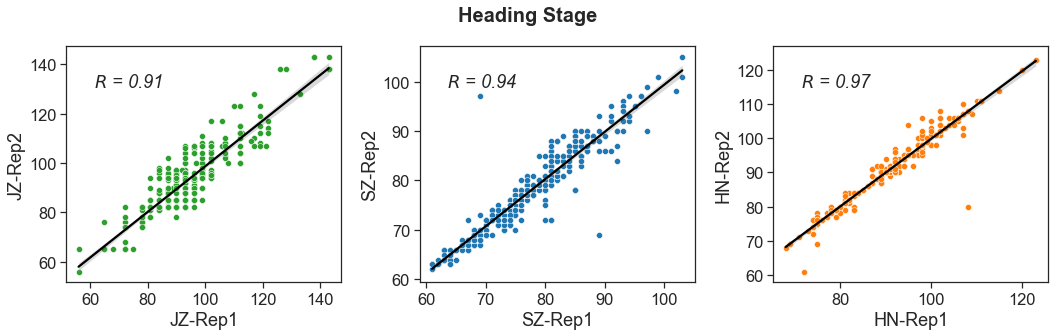

In [35]:
# 绘制抽穗期的
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制csq_JZ-Rep1和csq_JZ-Rep2的散点图
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style("ticks",{"xtick.major.size": 6, "ytick.major.size": 6})
sns.scatterplot(x='csq_JZ-Rep1', y='csq_JZ-Rep2', data=data_zong, ax=axes[0], color='#2ca02c')
sns.regplot(x='csq_JZ-Rep1', y='csq_JZ-Rep2', data=data_zong, scatter=False, ax=axes[0], color='black')
corr, _ = stats.pearsonr(data_zong['csq_JZ-Rep1'], data_zong['csq_JZ-Rep2'])
axes[0].text(0.1, 0.85, r'$R$ = %.2f' % corr, ha='left', va='center', transform=axes[0].transAxes, fontstyle='italic')
axes[0].set_xlabel('JZ-Rep1')
axes[0].set_ylabel('JZ-Rep2')

# 绘制csq_SZ-Rep1和csq_SZ-Rep2的散点图
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style("ticks",{"xtick.major.size": 6, "ytick.major.size": 6})
sns.scatterplot(x='csq_SZ-Rep1', y='csq_SZ-Rep2', data=data_zong, ax=axes[1], color='#1f77b4')
sns.regplot(x='csq_SZ-Rep1', y='csq_SZ-Rep2', data=data_zong, scatter=False, ax=axes[1], color='black')
corr, _ = stats.pearsonr(data_zong['csq_SZ-Rep1'], data_zong['csq_SZ-Rep2'])
axes[1].text(0.1, 0.85, r'$R$ = %.2f' % corr, ha='left', va='center', transform=axes[1].transAxes, fontstyle='italic')
axes[1].set_xlabel('SZ-Rep1')
axes[1].set_ylabel('SZ-Rep2')

# 绘制csq_HN-Rep1和csq_HN-Rep2的散点图
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style("ticks",{"xtick.major.size": 6, "ytick.major.size": 6})
sns.scatterplot(x='csq_HN-Rep1', y='csq_HN-Rep2', data=data_zong, ax=axes[2], color='#ff7f0e')
sns.regplot(x='csq_HN-Rep1', y='csq_HN-Rep2', data=data_zong, scatter=False, ax=axes[2], color='black')
corr, _ = stats.pearsonr(data_zong['csq_HN-Rep1'], data_zong['csq_HN-Rep2'])
axes[2].text(0.1, 0.85, r'$R$ = %.2f' % corr, ha='left', va='center', transform=axes[2].transAxes, fontstyle='italic')
axes[2].set_xlabel('HN-Rep1')
axes[2].set_ylabel('HN-Rep2')

# 设置整体标题
fig.suptitle('Heading Stage', fontsize=20, fontweight='bold', y=0.95)

plt.tight_layout()
plt.show()

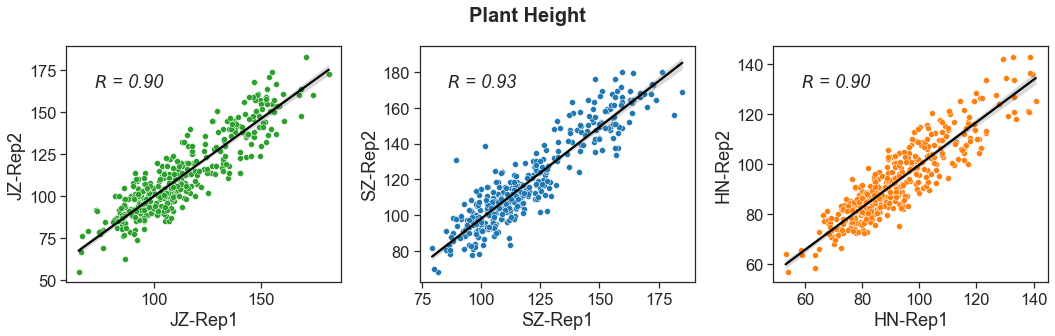

In [36]:
# 绘制株高的
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制zg_JZ-Rep1和zg_JZ-Rep2的散点图
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style("ticks",{"xtick.major.size": 6, "ytick.major.size": 6})
sns.scatterplot(x='zg_JZ-Rep1', y='zg_JZ-Rep2', data=data_zong, ax=axes[0], color='#2ca02c')
sns.regplot(x='zg_JZ-Rep1', y='zg_JZ-Rep2', data=data_zong, scatter=False, ax=axes[0], color='black')
corr, _ = stats.pearsonr(data_zong['zg_JZ-Rep1'], data_zong['zg_JZ-Rep2'])
axes[0].text(0.1, 0.85, r'$R$ = %.2f' % corr, ha='left', va='center', transform=axes[0].transAxes, fontstyle='italic')
axes[0].set_xlabel('JZ-Rep1')
axes[0].set_ylabel('JZ-Rep2')

# 绘制zg_SZ-Rep1和zg_SZ-Rep2的散点图
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style("ticks",{"xtick.major.size": 6, "ytick.major.size": 6})
sns.scatterplot(x='zg_SZ-Rep1', y='zg_SZ-Rep2', data=data_zong, ax=axes[1], color='#1f77b4')
sns.regplot(x='zg_SZ-Rep1', y='zg_SZ-Rep2', data=data_zong, scatter=False, ax=axes[1], color='black')
corr, _ = stats.pearsonr(data_zong['zg_SZ-Rep1'], data_zong['zg_SZ-Rep2'])
axes[1].text(0.1, 0.85, r'$R$ = %.2f' % corr, ha='left', va='center', transform=axes[1].transAxes, fontstyle='italic')
axes[1].set_xlabel('SZ-Rep1')
axes[1].set_ylabel('SZ-Rep2')

# 绘制zg_HN-Rep1和zg_HN-Rep2的散点图
sns.set(style="darkgrid")
sns.set(font_scale=1.5)
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style("ticks",{"xtick.major.size": 6, "ytick.major.size": 6})
sns.scatterplot(x='zg_HN-Rep1', y='zg_HN-Rep2', data=data_zong, ax=axes[2], color='#ff7f0e')
sns.regplot(x='zg_HN-Rep1', y='zg_HN-Rep2', data=data_zong, scatter=False, ax=axes[2], color='black')
corr, _ = stats.pearsonr(data_zong['zg_HN-Rep1'], data_zong['zg_HN-Rep2'])
axes[2].text(0.1, 0.85, r'$R$ = %.2f' % corr, ha='left', va='center', transform=axes[2].transAxes, fontstyle='italic')
axes[2].set_xlabel('HN-Rep1')
axes[2].set_ylabel('HN-Rep2')

# 设置整体标题
fig.suptitle('Plant Height', fontsize=20, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

### 397抽穗期

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [38]:
csq = pd.read_csv('./csq_zong_mean.txt',sep='\t',header=0)
csq.head()

,ID,csq_JZ_mean,csq_SZ_mean,csq_HN_mean
0,CX373,95.0,75.5,81.0
1,IRIS_313-11598,80.0,72.0,86.0
2,IRIS_313-11604,93.5,73.5,89.0
3,IRIS_313-11240,94.5,88.5,92.0
4,CX162,94.5,84.0,108.0


In [4]:
csq.mean()

csq_JZ_mean    92.437028
csq_SZ_mean    77.397985
csq_HN_mean    90.474811
dtype: float64

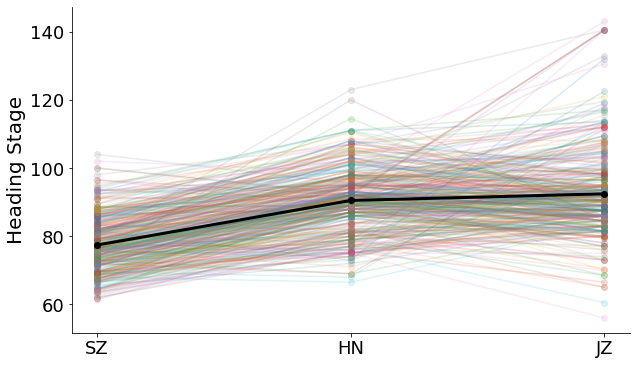

In [4]:
csq = csq[['ID','csq_SZ_mean','csq_HN_mean','csq_JZ_mean']]
# 绘制折线图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 遍历每个样本，绘制折线图
for i in range(len(csq)):
    sample_data = csq.iloc[i, 1:]  # 获取当前样本的表型数据
    plt.plot(csq.columns[1:], sample_data, marker='o',alpha=0.15)  # 绘制折线图

# 绘制每列均值的折线图
plt.plot(csq.columns[1:], csq.iloc[:, 1:].mean(axis=0), marker='o', color='black',linewidth=3)  # 绘制折线图

plt.ylabel('Heading Stage',fontsize=20) 

# 设置x轴刻度为[SZ,HN,JZ]
plt.xticks(np.arange(3), ['SZ', 'HN', 'JZ'],fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)  # 显示网格线
# 去掉上边框和右边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 保存图形
# plt.savefig('./csq_3pos.pdf', dpi=300, bbox_inches='tight')
plt.show()  # 显示图形

#### 使用群体平均值代替x轴

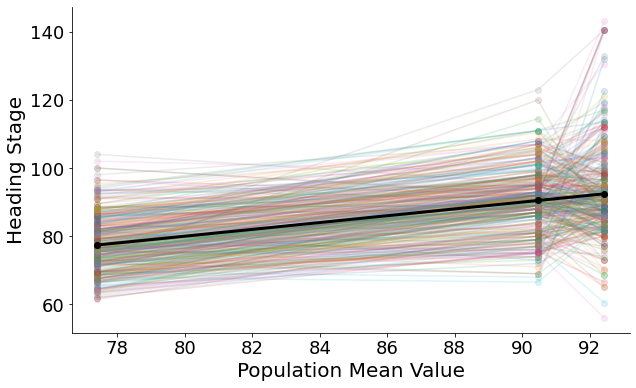

In [5]:
plt.figure(figsize=(10, 6))  # 设置图形大小

mean_values = csq.mean()

# 遍历每个样本，绘制折线图，使用群体均值作为x轴刻度
for i in range(len(csq)):
    sample_data = csq.iloc[i, 1:]  # 获取当前样本的表型数据
    plt.plot(mean_values, sample_data, marker='o',alpha=0.15)  # 绘制折线图

# 绘制每列均值的折线图
plt.plot(mean_values, csq.iloc[:, 1:].mean(axis=0), marker='o', color='black',linewidth=3)  # 绘制折线图

plt.ylabel('Heading Stage',fontsize=20) 
plt.xlabel('Population Mean Value',fontsize=20)

# 设置x轴刻度为[SZ,HN,JZ]
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)  # 显示网格线
# 去掉上边框和右边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 保存图形
# plt.savefig('./csq_population_mean.pdf', dpi=300, bbox_inches='tight')
plt.show()  # 显示图形

#### 对每个样本进行线性回归

In [39]:
csq['JZ_mean'] = csq['csq_JZ_mean'].mean()
csq['SZ_mean'] = csq['csq_SZ_mean'].mean()
csq['HN_mean'] = csq['csq_HN_mean'].mean()
csq.head()

,ID,csq_JZ_mean,csq_SZ_mean,csq_HN_mean,JZ_mean,SZ_mean,HN_mean
0,CX373,95.0,75.5,81.0,92.437028,77.397985,90.474811
1,IRIS_313-11598,80.0,72.0,86.0,92.437028,77.397985,90.474811
2,IRIS_313-11604,93.5,73.5,89.0,92.437028,77.397985,90.474811
3,IRIS_313-11240,94.5,88.5,92.0,92.437028,77.397985,90.474811
4,CX162,94.5,84.0,108.0,92.437028,77.397985,90.474811


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
from sklearn.exceptions import DataConversionWarning

In [41]:
csq = csq.head(1)
csq.head()

,ID,csq_JZ_mean,csq_SZ_mean,csq_HN_mean,JZ_mean,SZ_mean,HN_mean
0,CX373,95.0,75.5,81.0,92.437028,77.397985,90.474811


e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


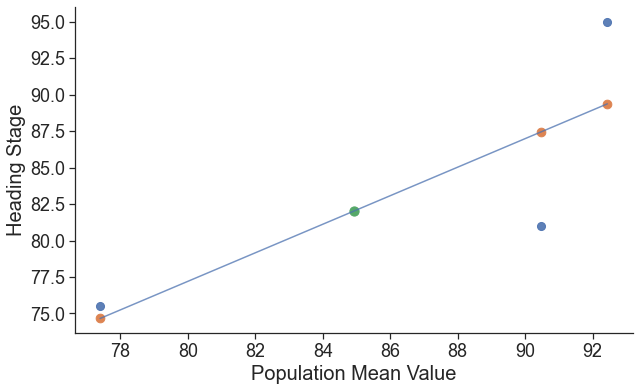

In [51]:
warnings.filterwarnings("ignore", category=DataConversionWarning)
plt.figure(figsize=(10, 6))
csq['SZ_predict'] = np.nan
csq['HN_predict'] = np.nan
csq['JZ_predict'] = np.nan
csq['k'] = np.nan
csq['b'] = np.nan
csq['yb'] = np.nan

# 循环遍历每一行
for index, row in csq.iterrows():
    sample_name = row['ID']
    data = pd.DataFrame({'x': [row['SZ_mean'], row['HN_mean'], row['JZ_mean']],
                         'y': [row['csq_SZ_mean'], row['csq_HN_mean'], row['csq_JZ_mean']]})
    # 对data的x和y列进行线性回归
    model = LinearRegression().fit(data[['x']], data['y'])
    # 获取斜率，截距为x=(JZ_mean+SZ_mean)/2时的值
    k = model.coef_[0]
    b = model.intercept_
    x = (row['JZ_mean'] + row['SZ_mean']) / 2  
    # 计算预测值
    y = k * x + b
    # 将预测值赋值给对应的列
    csq.loc[index, 'SZ_predict'] = k*row['SZ_mean'] + b
    csq.loc[index, 'HN_predict'] = k*row['HN_mean'] + b
    csq.loc[index, 'JZ_predict'] = k*row['JZ_mean'] + b
    csq.loc[index, 'k'] = k
    csq.loc[index, 'b'] = y
    csq.loc[index, 'yb'] = b
    # 绘制原始数据点
    plt.scatter(data['x'], data['y'], label=sample_name,alpha=0.9,s=65)
    # 绘制拟合直线
    plt.plot([min(data['x']), max(data['x'])], [model.predict([[min(data['x'])]]), 
                                                model.predict([[max(data['x'])]])], label=f'{sample_name} fit',alpha=0.75)

for index, row in csq.iterrows():                                               
    data = pd.DataFrame({'x': [row['SZ_mean'], row['HN_mean'], row['JZ_mean']],
                         'y': [row['SZ_predict'], row['HN_predict'], row['JZ_predict']]})
    # 添加点
    plt.scatter(data['x'], data['y'], label=sample_name,alpha=1,s=75)

x1 = (csq['JZ_mean']+csq['SZ_mean'])/2
y1 = k*x1 + b
plt.scatter(x1, y1, label='SZ',alpha=1,s=85)

# 添加标签和标题
plt.ylabel('Heading Stage',fontsize=20) 
plt.xlabel('Population Mean Value',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)  # 显示网格线
# 去掉上边框和右边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 保存图形
# plt.savefig('./csq_population_mean_fit.pdf', dpi=300, bbox_inches='tight')
# 显示图像
plt.show()

e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature n

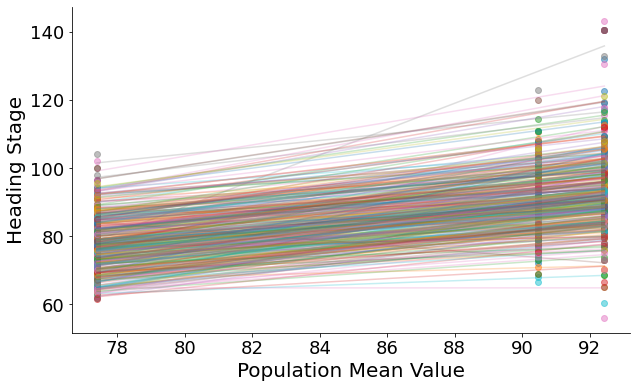

In [8]:
warnings.filterwarnings("ignore", category=DataConversionWarning)
plt.figure(figsize=(10, 6))
csq['SZ_predict'] = np.nan
csq['HN_predict'] = np.nan
csq['JZ_predict'] = np.nan
csq['k'] = np.nan
csq['b'] = np.nan
csq['yb'] = np.nan

# 循环遍历每一行
for index, row in csq.iterrows():
    sample_name = row['ID']
    data = pd.DataFrame({'x': [row['SZ_mean'], row['HN_mean'], row['JZ_mean']],
                         'y': [row['csq_SZ_mean'], row['csq_HN_mean'], row['csq_JZ_mean']]})
    # 对data的x和y列进行线性回归
    model = LinearRegression().fit(data[['x']], data['y'])
    # 获取斜率，截距为x=(JZ_mean+SZ_mean)/2时的值
    k = model.coef_[0]
    b = model.intercept_
    x = (row['JZ_mean'] + row['SZ_mean']) / 2  
    # 计算预测值
    y = k * x + b
    # 将预测值赋值给对应的列
    csq.loc[index, 'SZ_predict'] = k*row['SZ_mean'] + b
    csq.loc[index, 'HN_predict'] = k*row['HN_mean'] + b
    csq.loc[index, 'JZ_predict'] = k*row['JZ_mean'] + b
    csq.loc[index, 'k'] = k
    csq.loc[index, 'b'] = y
    csq.loc[index, 'yb'] = b
    # 绘制原始数据点
    plt.scatter(data['x'], data['y'], label=sample_name,alpha=0.5)
    # 绘制拟合直线
    plt.plot([min(data['x']), max(data['x'])], [model.predict([[min(data['x'])]]), 
                                                model.predict([[max(data['x'])]])], label=f'{sample_name} fit',alpha=0.25)

# 添加标签和标题
plt.ylabel('Heading Stage',fontsize=20) 
plt.xlabel('Population Mean Value',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)  # 显示网格线
# 去掉上边框和右边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 保存图形
# plt.savefig('./csq_population_mean_fit.pdf', dpi=300, bbox_inches='tight')
# 显示图像
plt.show()

In [9]:
csq.head()

,ID,csq_SZ_mean,csq_HN_mean,csq_JZ_mean,JZ_mean,SZ_mean,HN_mean,SZ_predict,HN_predict,JZ_predict,k,b,yb
0,CX373,75.5,81.0,95.0,92.437028,77.397985,90.474811,74.657020,87.460863,89.382117,0.979125,82.019569,-1.125254
1,IRIS_313-11598,72.0,86.0,80.0,92.437028,77.397985,90.474811,72.518324,82.027405,83.454271,0.727170,77.986297,16.236796
2,IRIS_313-11604,73.5,89.0,93.5,92.437028,77.397985,90.474811,73.360886,90.066215,92.572899,1.277476,82.966893,-25.513168
3,IRIS_313-11240,88.5,92.0,94.5,92.437028,77.397985,90.474811,88.373642,92.968447,93.657911,0.351370,91.015777,61.178309
4,CX162,84.0,108.0,94.5,92.437028,77.397985,90.474811,85.094220,99.613555,101.792225,1.110310,93.443222,-0.841563


In [25]:
# 保存csq
csq.to_csv('./csq_k&b_fit.txt',sep='\t',header=True,index=False)

In [46]:
# 创建一个新的dataframe，列名为csq的ID列，索引为SZ、HN、JZ
csq_new = pd.DataFrame(index=csq['ID'],columns=['SZ','HN','JZ'])
# 遍历每一行
for index, row in csq.iterrows():
    # 将每一行的SZ_predict、HN_predict、JZ_predict与真实值的MSE赋值给csq_new
    csq_new.loc[row['ID'], 'SZ'] = (row['csq_SZ_mean'] - row['SZ_predict'])**2
    csq_new.loc[row['ID'], 'HN'] = (row['csq_HN_mean'] - row['HN_predict'])**2
    csq_new.loc[row['ID'], 'JZ'] = (row['csq_JZ_mean'] - row['JZ_predict'])**2
csq_new.head()

,SZ,HN,JZ
ID,,,
CX373,0.710615,41.742747,31.560606
IRIS_313-11598,0.268659,15.781509,11.931989
IRIS_313-11604,0.019353,1.136814,0.859516
IRIS_313-11240,0.015966,0.937889,0.709114
CX162,1.197317,70.332455,53.176541


In [12]:
# 保存csq_new
csq_new.to_csv('./csq_mse.txt',sep='\t',header=True,index=True)

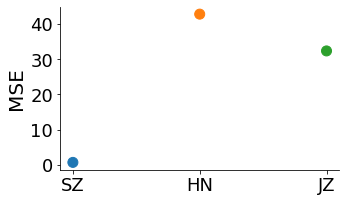

In [47]:
# 绘制散点图，x轴为SZ、HN、JZ的，y轴为每一列的均值，每一个点使用不同的颜色
plt.figure(figsize=(5, 3))
avg_values = csq_new.mean()
plt.scatter(['SZ', 'HN', 'JZ'], avg_values, c=['#1f77b4', '#ff7f0e', '#2ca02c'],s=100)
plt.ylabel('MSE',fontsize=20)
plt.xlabel('',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)  # 显示网格线
# 去掉上边框和右边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 保存图形
plt.savefig('./csq_mse_population.pdf', dpi=300, bbox_inches='tight')
# 显示图像
plt.show()

#### 397株高

In [5]:
zg = pd.read_csv('./zg_zong_mean.txt',sep='\t',header=0)
zg.head()

,ID,zg_JZ_mean,zg_SZ_mean,zg_HN_mean
0,CX373,107.165,109.00,86.7
1,IRIS_313-11598,123.865,151.00,105.1
2,IRIS_313-11604,123.585,135.15,99.1
3,IRIS_313-11240,90.985,96.50,80.4
4,CX162,95.215,109.35,84.1


In [6]:
zg.mean()

zg_JZ_mean    112.242506
zg_SZ_mean    118.385139
zg_HN_mean     92.185894
dtype: float64

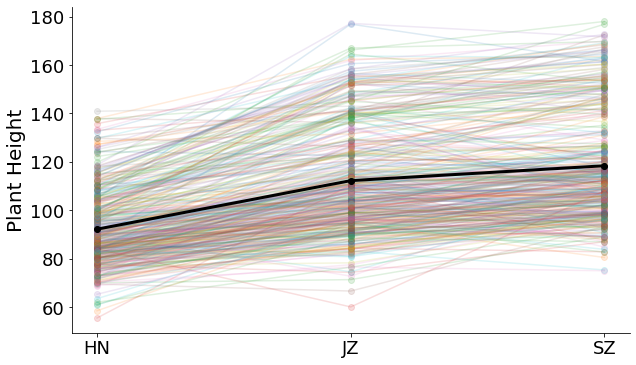

In [9]:
zg = zg[['ID','zg_HN_mean','zg_JZ_mean','zg_SZ_mean']]
# 绘制折线图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 遍历每个样本，绘制折线图
for i in range(len(zg)):
    sample_data = zg.iloc[i, 1:]  # 获取当前样本的表型数据
    plt.plot(zg.columns[1:], sample_data, marker='o',alpha=0.15)  # 绘制折线图

# 绘制每列均值的折线图
plt.plot(zg.columns[1:], zg.iloc[:, 1:].mean(axis=0), marker='o', color='black',linewidth=3)  # 绘制折线图

plt.ylabel('Plant Height',fontsize=20)
# 设置x轴刻度为[HN,JZ,SZ]
plt.xticks(np.arange(3), ['HN', 'JZ', 'SZ'],fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)  # 显示网格线
# 去掉上边框和右边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 保存图形
plt.savefig('./zg_3pos.pdf', dpi=300, bbox_inches='tight')
plt.show()  # 显示图形

#### 使用群体平均值代替x轴

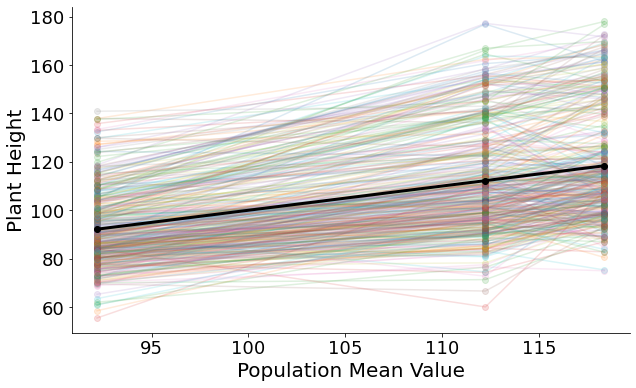

In [10]:
# 绘制折线图
plt.figure(figsize=(10, 6))  # 设置图形大小

mean_values = zg.mean()

# 遍历每个样本，绘制折线图，使用群体均值作为x轴刻度
for i in range(len(zg)):
    sample_data = zg.iloc[i, 1:]  # 获取当前样本的表型数据
    plt.plot(mean_values, sample_data, marker='o',alpha=0.15)  # 绘制折线图

# 绘制每列均值的折线图
plt.plot(mean_values, zg.iloc[:, 1:].mean(axis=0), marker='o', color='black',linewidth=3)  # 绘制折线图

plt.ylabel('Plant Height',fontsize=20)
plt.xlabel('Population Mean Value',fontsize=20)

# 设置x轴刻度为[HN,JZ,SZ]
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)  # 显示网格线
# 去掉上边框和右边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 保存图形
plt.savefig('./zg_population_mean.pdf', dpi=300, bbox_inches='tight')
plt.show()  # 显示图形

#### 对每个样本进行线性回归

In [11]:
zg['JZ_mean'] = zg['zg_JZ_mean'].mean()
zg['SZ_mean'] = zg['zg_SZ_mean'].mean()
zg['HN_mean'] = zg['zg_HN_mean'].mean()
zg.head()

,ID,zg_HN_mean,zg_JZ_mean,zg_SZ_mean,JZ_mean,SZ_mean,HN_mean
0,CX373,86.7,107.165,109.00,112.242506,118.385139,92.185894
1,IRIS_313-11598,105.1,123.865,151.00,112.242506,118.385139,92.185894
2,IRIS_313-11604,99.1,123.585,135.15,112.242506,118.385139,92.185894
3,IRIS_313-11240,80.4,90.985,96.50,112.242506,118.385139,92.185894
4,CX162,84.1,95.215,109.35,112.242506,118.385139,92.185894


e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
e:\softwore\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature n

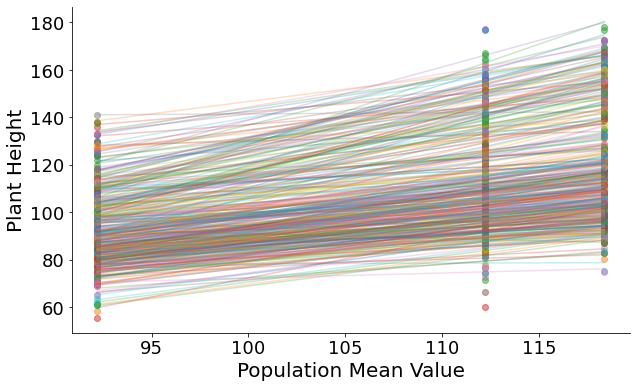

In [12]:
warnings.filterwarnings("ignore", category=DataConversionWarning)
plt.figure(figsize=(10, 6))
zg['SZ_predict'] = np.nan
zg['HN_predict'] = np.nan
zg['JZ_predict'] = np.nan
zg['k'] = np.nan
zg['b'] = np.nan
zg['yb'] = np.nan

# 循环遍历每一行
for index, row in zg.iterrows():
    sample_name = row['ID']
    data = pd.DataFrame({'x': [row['SZ_mean'], row['HN_mean'], row['JZ_mean']],
                         'y': [row['zg_SZ_mean'], row['zg_HN_mean'], row['zg_JZ_mean']]})
    # 对data的x和y列进行线性回归
    model = LinearRegression().fit(data[['x']], data['y'])
    # 获取斜率，截距为x=(JZ_mean+SZ_mean)/2时的值
    k = model.coef_[0]
    b = model.intercept_
    x = (row['zg_JZ_mean'] + row['zg_SZ_mean']) / 2  
    # 计算预测值
    y = k * x + b
    # 将预测值赋值给对应的列
    zg.loc[index, 'SZ_predict'] = k*row['SZ_mean'] + b
    zg.loc[index, 'HN_predict'] = k*row['HN_mean'] + b
    zg.loc[index, 'JZ_predict'] = k*row['JZ_mean'] + b
    zg.loc[index, 'k'] = k
    zg.loc[index, 'b'] = y
    zg.loc[index, 'yb'] = b
    # 绘制原始数据点
    plt.scatter(data['x'], data['y'], label=sample_name,alpha=0.5)
    # 绘制拟合直线
    plt.plot([min(data['x']), max(data['x'])], [model.predict([[min(data['x'])]]), 
                                                model.predict([[max(data['x'])]])], label=f'{sample_name} fit',alpha=0.25)

# 添加标签和标题
plt.ylabel('Plant Height',fontsize=20)
plt.xlabel('Population Mean Value',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)  # 显示网格线
# 去掉上边框和右边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 保存图形
plt.savefig('./zg_population_mean_fit.pdf', dpi=300, bbox_inches='tight')
# 显示图像
plt.show()

In [13]:
zg.head()

,ID,zg_HN_mean,zg_JZ_mean,zg_SZ_mean,JZ_mean,SZ_mean,HN_mean,SZ_predict,HN_predict,JZ_predict,k,b,yb
0,CX373,86.7,107.165,109.00,112.242506,118.385139,92.185894,110.583039,87.184829,105.097132,0.893087,101.381884,4.854787
1,IRIS_313-11598,105.1,123.865,151.00,112.242506,118.385139,92.185894,143.361791,102.760686,133.842522,1.549705,172.879586,-40.100273
2,IRIS_313-11604,99.1,123.585,135.15,112.242506,118.385139,92.185894,133.697883,98.655268,125.481849,1.337543,148.387264,-24.647328
3,IRIS_313-11240,80.4,90.985,96.50,112.242506,118.385139,92.185894,95.688183,80.151369,92.045447,0.593025,81.074476,25.482803
4,CX162,84.1,95.215,109.35,112.242506,118.385139,92.185894,105.517719,82.926308,100.220973,0.862292,91.632535,3.435104


In [17]:
# 保存zg
zg.to_csv('./zg_k&b_fit.txt',sep='\t',header=True,index=False)

In [48]:
# 创建一个新的dataframe，列名为csq的ID列，索引为HN、JZ、SZ
zg_new = pd.DataFrame(index=zg['ID'],columns=['HN','JZ','SZ'])
# 遍历每一行
for index, row in zg.iterrows():
    # 将每一行的SZ_predict、HN_predict、JZ_predict与真实值的MSE赋值给zg_new
    zg_new.loc[row['ID'], 'HN'] = (row['zg_HN_mean'] - row['HN_predict'])**2
    zg_new.loc[row['ID'], 'JZ'] = (row['zg_JZ_mean'] - row['JZ_predict'])**2
    zg_new.loc[row['ID'], 'SZ'] = (row['zg_SZ_mean'] - row['SZ_predict'])**2
zg_new.head()

,HN,JZ,SZ
ID,,,
CX373,0.235059,4.276076,2.506011
IRIS_313-11598,5.472388,99.550951,58.342231
IRIS_313-11604,0.197787,3.598035,2.108643
IRIS_313-11240,0.061817,1.124548,0.659046
CX162,1.377554,25.05977,14.686378


In [18]:
# 保存zg_new
zg_new.to_csv('./zg_mse.txt',sep='\t',header=True,index=True)

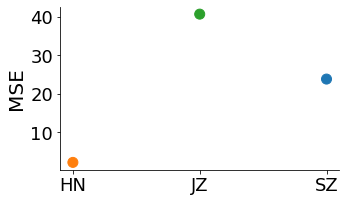

In [52]:
# 绘制散点图，x轴为SZ、HN、JZ的，y轴为每一列的均值，每一个点使用不同的颜色
plt.figure(figsize=(5, 3))
avg_values = zg_new.mean()
plt.scatter(['HN', 'JZ', 'SZ'], avg_values, c=['#ff7f0e', '#2ca02c', '#1f77b4'],s=100)
plt.ylabel('MSE',fontsize=20)
plt.xlabel('',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)  # 显示网格线
# 去掉上边框和右边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 保存图形
plt.savefig('./zg_mse.pdf', dpi=300, bbox_inches='tight')
# 显示图像
plt.show()

#### 绘制地图，将取样点标注在地图上

In [7]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType

def geo_effectscatter() -> Geo:

    # 初始化地图参数 page_title: 页面标题， theme: 画布主题（主题列表可见Echarts官网）
    InitOpts = opts.InitOpts(page_title="中国地图", theme="light")
    c = (
        # 声明对象时将初始化参数
        Geo(InitOpts)
        # 添加底部地图
        .add_schema(
            maptype="china")

        # 增加区域点（阿克赛钦和藏南地区）
        .add_coordinate(
            name='JingZhou',
            longitude=112.24,
            latitude=30.34
        )
        .add_coordinate(
            name='ShenZhen',
            longitude=114.06,
            latitude=22.54
        )
        .add_coordinate(
            name='HaiNan',
            longitude=109.61,
            latitude=18.31
        )

        # 将剧中地图缺少的地方标记出来
        .add(
            "",
            [['HaiNan',100], ['JingZhou', 100], ['ShenZhen', 100]],
            type_=ChartType.EFFECT_SCATTER,
        )
        # 显示出这个点的标签（formatter={b} 表示显示地区名称，详细可见：
        #  https://pyecharts.org/#/zh-cn/series_options ）
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, formatter="{b}", font_size=14, font_style="italic", color="black"))

        # 设置地图名称，即左上角
        .set_global_opts(title_opts=opts.TitleOpts(title=None))
    )
    return c

# 生成对象
c = geo_effectscatter()

# 渲染地图
c.render()

'd:\\gzy_system\\zhuomian\\小\\01.简单分析\\render.html'

#### GWAS文件

In [42]:
csq = pd.read_csv('./02.397_g/csq_k&b_fit.txt',sep='\t',header=0)
csq_k = csq[['ID','ID','k']]
csq_b = csq[['ID','ID','b']]
csq_k.head()

,ID,ID,k
0,CX373,CX373,0.979125
1,IRIS_313-11598,IRIS_313-11598,0.727170
2,IRIS_313-11604,IRIS_313-11604,1.277476
3,IRIS_313-11240,IRIS_313-11240,0.351370
4,CX162,CX162,1.110310


In [43]:
# 保存csq_k、csq_b
csq_k.to_csv('./02.397_g/csq_k.txt',sep='\t',header=False,index=False)
csq_b.to_csv('./02.397_g/csq_b.txt',sep='\t',header=False,index=False)

In [44]:
zg = pd.read_csv('./02.397_g/zg_k&b_fit.txt',sep='\t',header=0)
zg_k = zg[['ID','ID','k']]
zg_b = zg[['ID','ID','b']]
zg_k.head()

,ID,ID,k
0,CX373,CX373,0.893087
1,IRIS_313-11598,IRIS_313-11598,1.549705
2,IRIS_313-11604,IRIS_313-11604,1.337543
3,IRIS_313-11240,IRIS_313-11240,0.593025
4,CX162,CX162,0.862292


In [45]:
# 保存zg_k、zg_b
zg_k.to_csv('./02.397_g/zg_k.txt',sep='\t',header=False,index=False)
zg_b.to_csv('./02.397_g/zg_b.txt',sep='\t',header=False,index=False)

#### 添加亚群信息

In [5]:
dd = {}
all_sub_ms = open('./02.397_g/3k_sub.txt','r')
for l in all_sub_ms:
    l = l.strip().split('\t')
    dd[l[0]] = l[-1]
all_sub_ms.close()

In [6]:
f1 = open('./02.397_g/csq_k.txt','r')
for l in f1:
    ls = l.strip().split('\t')
    with open('./02.397_g/397_sub.txt','a')as fd:
        fd.write(ls[0]+'\t'+dd[ls[1]]+'\n')

In [7]:
f2 = open('./02.397_g/397_sub.txt','r')
for l in f2:
    ls = l.strip().split('\t')
    id = ls[0]
    sub = ls[1]
    with open(f'./02.397_g/397_sub_{sub}.txt','a')as fd:
        fd.write(id+'\n')